In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## to make it possible to display multiple output inside one cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 50
pd.set_option('display.float_format', lambda x: '%9.8f' % x)

In [292]:
file_name = "data/in-vehicle-coupon-recommendation.csv"
data = pd.read_csv(file_name)
data = data.drop(['car', 'direction_opp'], axis=1)
data = data.drop_duplicates().reset_index(drop=True)

## aside: looking at missing values

In [293]:
data.fillna('unknown', inplace=True)

In [343]:
## how many rows had at least one missing value? 603
data.loc[(data.Bar == 'unknown') | (data.CoffeeHouse == 'unknown')  | (data.Restaurant20To50 == 'unknown')  |
     (data.CarryAway == 'unknown')  | (data.RestaurantLessThan20 == 'unknown')].shape[0]

603

In [344]:
## how many rows had all 5 missing value? 42 (probably two people?)
data.loc[(data.Bar == 'unknown') & (data.CoffeeHouse == 'unknown')  & (data.Restaurant20To50 == 'unknown')  &
     (data.CarryAway == 'unknown')  & (data.RestaurantLessThan20 == 'unknown')].shape[0]

42

In [345]:
## how were records with at least one missing value distributed across coupon types?
data.loc[(data.Bar == 'unknown') | (data.CoffeeHouse == 'unknown')  | (data.Restaurant20To50 == 'unknown')  |
     (data.CarryAway == 'unknown')  | (data.RestaurantLessThan20 == 'unknown'), 'coupon'].value_counts()

Coffee House             180
Restaurant(<20)          133
Carry out & Take away    111
Bar                      104
Restaurant(20-50)         75
Name: coupon, dtype: int64

## back to main investigation

In [295]:
## populate new column minsToCouponDest with values ['5-14', '15-24', '25plus']
data.loc[(data.toCoupon_GEQ25min == 1), 'minsToCouponDest'] = '25plus'
data.loc[(data.toCoupon_GEQ25min == 0) & (data.toCoupon_GEQ15min==1), 'minsToCouponDest'] = '15-24'
data.loc[(data.toCoupon_GEQ25min == 0) & (data.toCoupon_GEQ15min==0), 'minsToCouponDest'] = '5-14'

## drop separate cols
data = data.drop(['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'], axis=1)

In [296]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'direction_same', 'Y',
       'minsToCouponDest'],
      dtype='object')

# Create reordered dataframes

In [297]:
## Reorder by coupon type
coupon_order = ['Carry out & Take away', 'Restaurant(<20)', 'Coffee House', 'Restaurant(20-50)', 'Bar']

Bar_data = data[data['coupon'] == 'Bar']
CoffeeHouse_data = data[data['coupon'] == 'Coffee House']
CarryAway_data = data[data['coupon'] == 'Carry out & Take away']
RestaurantLessThan20_data = data[data['coupon'] == 'Restaurant(<20)']
Restaurant20To50_data = data[data['coupon'] == 'Restaurant(20-50)']

sorted_data = pd.concat([CarryAway_data, RestaurantLessThan20_data, CoffeeHouse_data, Restaurant20To50_data, 
                         Bar_data]).reset_index(drop=True)

## Driver attributes

gender, age, maritalStatus, has_children, education, occupation, income

Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50

In [298]:
## reorder by gender
gender_order =  ['Female', 'Male']
df_list = []
for val in gender_order:
    df_list.append(data[data['gender']==val])
gender_sorted_data = pd.concat(df_list).reset_index(drop=True)

In [299]:
## reorder by age (note, the age label is the bottom of the range, so 21 is really 21-25)
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus' ]
df_list = []
for val in age_order:
    df_list.append(data[data['age']==val])
age_sorted_data = pd.concat(df_list).reset_index(drop=True)

In [300]:
## reorder by has_children
has_children_order = [1,0 ]
df_list = []
for val in has_children_order:
    df_list.append(data[data['has_children']==val])
has_children_sorted_data = pd.concat(df_list).reset_index(drop=True)

In [301]:
## reorder by education
education_order = ['Some High School', 'High School Graduate', 'Some college - no degree',
                            'Associates degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)']
df_list = []
for val in education_order:
    df_list.append(data[data['education']==val])
education_sorted_data = pd.concat(df_list).reset_index(drop=True)

In [302]:
## reorder by occupation
occupation_order = ['Architecture & Engineering',
       'Arts Design Entertainment Sports & Media',
       'Building & Grounds Cleaning & Maintenance',
       'Business & Financial', 'Community & Social Services',
       'Computer & Mathematical', 'Construction & Extraction',
       'Education&Training&Library', 'Farming Fishing & Forestry',
       'Food Preparation & Serving Related',
       'Healthcare Practitioners & Technical', 'Healthcare Support',
       'Installation Maintenance & Repair', 'Legal',
       'Life Physical Social Science', 'Management',
       'Office & Administrative Support', 'Personal Care & Service',
       'Production Occupations', 'Protective Service', 'Retired',
       'Sales & Related', 'Student', 'Transportation & Material Moving',
       'Unemployed']
df_list = []
for val in occupation_order:
    df_list.append(data[data['occupation']==val])
occupation_sorted_data = pd.concat(df_list).reset_index(drop=True)

In [303]:
## reorder by maritalStatus
maritalStatus_order =  ['Single', 'Unmarried partner', 'Married partner', 'Divorced', 'Widowed']
df_list = []
for val in maritalStatus_order:
    df_list.append(data[data['maritalStatus']==val])
maritalStatus_sorted_data = pd.concat(df_list).reset_index(drop=True)

In [304]:
## reorder by income
income_order = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999',
                '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']
df_list = []
for val in income_order:
    df_list.append(data[data['income']==val])
income_sorted_data = pd.concat(df_list).reset_index(drop=True)

In [305]:
## reorder by visit frequencies
## Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50

visit_freq_order = ['unknown', 'never', 'less1', '1~3', '4~8', 'gt8']

df_list = []
for val in visit_freq_order:
    df_list.append(data[data['Bar']==val])
Bar_freq_sorted_data = pd.concat(df_list).reset_index(drop=True)

df_list = []
for val in visit_freq_order:
    df_list.append(data[data['CoffeeHouse']==val])
CoffeeHouse_freq_sorted_data = pd.concat(df_list).reset_index(drop=True)

df_list = []
for val in visit_freq_order:
    df_list.append(data[data['CarryAway']==val])
CarryAway_freq_sorted_data = pd.concat(df_list).reset_index(drop=True)

df_list = []
for val in visit_freq_order:
    df_list.append(data[data['RestaurantLessThan20']==val])
RestaurantLessThan20_freq_sorted_data = pd.concat(df_list).reset_index(drop=True)

df_list = []
for val in visit_freq_order:
    df_list.append(data[data['Restaurant20To50']==val])
Restaurant20To50_freq_sorted_data = pd.concat(df_list).reset_index(drop=True)

In [306]:
driver_attribute_orderings = {'gender': {'order': gender_order, 'sorted_data': gender_sorted_data},
                              'age': {'order': age_order, 'sorted_data': age_sorted_data},
                              'maritalStatus': {'order': maritalStatus_order, 'sorted_data': maritalStatus_sorted_data},
                              'has_children': {'order': has_children_order, 'sorted_data': has_children_sorted_data},
                              'education': {'order': education_order, 'sorted_data': education_sorted_data},
                              'occupation': {'order': occupation_order, 'sorted_data': occupation_sorted_data},
                              'income': {'order': income_order, 'sorted_data': income_sorted_data},
                              'Bar': {'order': visit_freq_order, 'sorted_data': Bar_freq_sorted_data},
                              'CoffeeHouse': {'order': visit_freq_order, 'sorted_data': CoffeeHouse_freq_sorted_data},
                              'CarryAway': {'order': visit_freq_order, 'sorted_data': CarryAway_freq_sorted_data},
                              'RestaurantLessThan20': {'order': visit_freq_order, 'sorted_data': RestaurantLessThan20_freq_sorted_data},
                              'Restaurant20To50': {'order': visit_freq_order, 'sorted_data': Restaurant20To50_freq_sorted_data}
                             }

## Contextual attributes

destination, passanger, weather, temperature, time, expiration, minsToCouponDest, direction_same 

In [307]:
## reorder by destination
destination_order = ['Home', 'Work', 'No Urgent Place']
df_list = []
for tm in destination_order:
    df_list.append(data[data['destination']==tm])
    
destination_sorted_data = pd.concat(df_list).reset_index(drop=True)

In [308]:
## reorder by passanger
passanger_order = ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
df_list = []
for tm in passanger_order:
    df_list.append(data[data['passanger']==tm])
    
passanger_sorted_data = pd.concat(df_list).reset_index(drop=True)

In [309]:
## reorder by weather
weather_order = ['Sunny', 'Rainy', 'Snowy']
df_list = []
for tm in weather_order:
    df_list.append(data[data['weather']==tm])
    
weather_sorted_data = pd.concat(df_list).reset_index(drop=True)

In [310]:
## reorder by temperature
temperature_order = [30, 55, 80]
df_list = []
for tm in temperature_order:
    df_list.append(data[data['temperature']==tm])
    
temperature_sorted_data = pd.concat(df_list).reset_index(drop=True)

In [311]:
## reorder by expiration
expiration_order = ['2h', '1d']
df_list = []
for tm in expiration_order:
    df_list.append(data[data['expiration']==tm])
    
expiration_sorted_data = pd.concat(df_list).reset_index(drop=True)

In [312]:
## reorder by time
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
df_list = []
for tm in time_order:
    df_list.append(data[data['time']==tm])
    
time_sorted_data = pd.concat(df_list).reset_index(drop=True)

In [313]:
## reorder by minsToCouponDest
minsToCouponDest_order = ['5-14', '15-24', '25plus']
df_list = []
for tm in minsToCouponDest_order:
    df_list.append(data[data['minsToCouponDest']==tm])
    
minsToCouponDest_sorted_data = pd.concat(df_list).reset_index(drop=True)

In [314]:
## reorder by direction_same
direction_same_order = [1,0]
df_list = []
for tm in direction_same_order:
    df_list.append(data[data['direction_same']==tm])
    
direction_same_sorted_data = pd.concat(df_list).reset_index(drop=True)

In [315]:
contextual_attribute_orderings = {'destination': {'order': destination_order, 'sorted_data': destination_sorted_data},
                                  'passanger': {'order': passanger_order, 'sorted_data': passanger_sorted_data},
                                  'weather': {'order': weather_order, 'sorted_data': weather_sorted_data},
                                  'temperature': {'order': temperature_order, 'sorted_data': temperature_sorted_data},
                                  'time': {'order': time_order, 'sorted_data': time_sorted_data},
                                  'expiration': {'order': expiration_order, 'sorted_data': expiration_sorted_data},
                                  'minsToCouponDest': {'order': minsToCouponDest_order, 'sorted_data': minsToCouponDest_sorted_data},
                                  'direction_same': {'order': direction_same_order, 'sorted_data': direction_same_sorted_data}
                                 }

# Total count by coupon type

In [346]:
data.coupon.value_counts()

Coffee House             3989
Restaurant(<20)          2779
Carry out & Take away    2344
Bar                      2010
Restaurant(20-50)        1488
Name: coupon, dtype: int64

Text(0.5, 1.0, 'Number of data records by coupon type')

[Text(0, 0.5, '')]

[Text(0.5, 0, '')]

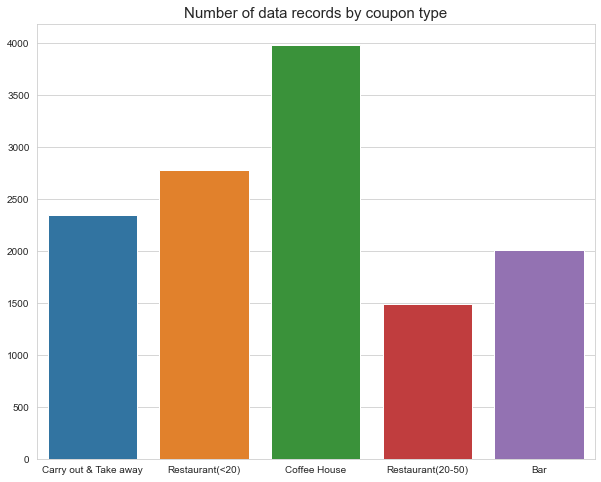

In [349]:
coupon_counts = data.coupon.value_counts()
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=coupon_counts.index, y=coupon_counts, order=coupon_order,
            ci=None).set_title('Number of data records by coupon type', fontsize=15);
ax.set(ylabel=None)
ax.set(xlabel=None)
plt.savefig('plots/Number-records-by-coupon-type.png', bbox_inches='tight')

# Acceptance rate by coupon type

Text(0.5, 1.0, 'Acceptance rate by coupon type')

[Text(0, 0.5, 'Acceptance rate')]

[Text(0.5, 0, '')]

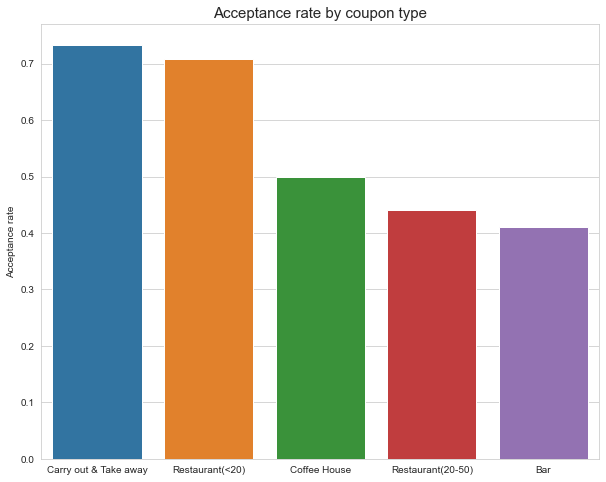

In [316]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x="coupon", y="Y", data=sorted_data, 
            ci=None).set_title('Acceptance rate by coupon type', fontsize=15);
ax.set(ylabel='Acceptance rate')
ax.set(xlabel=None)
plt.savefig('plots/acceptance-rate-by-coupon-type.png', bbox_inches='tight')

# Driver Bar/Restaurant visiting habits overview

In [317]:
driver_attributes_list = list(driver_attribute_orderings.keys())
driver_personal_data = data[driver_attributes_list].drop_duplicates()
driver_personal_data.shape

(567, 12)

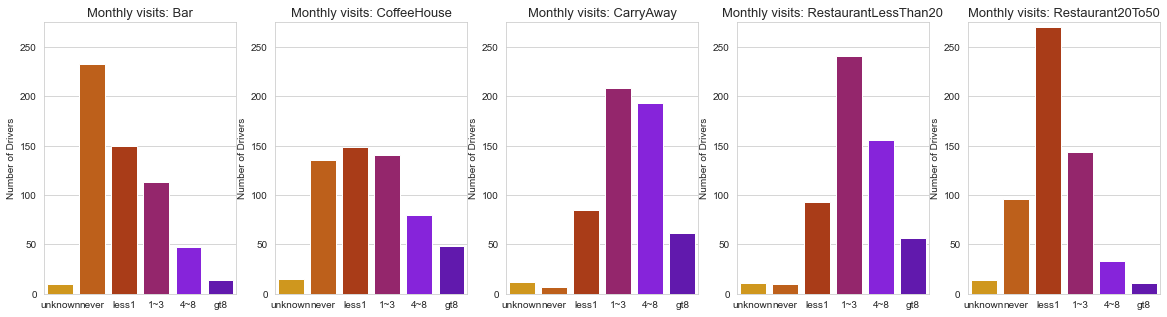

In [318]:
fig, ax = plt.subplots(1,5, figsize=(20,5))

habit_features_list = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for i in range(len(habit_features_list)):
    vc = driver_personal_data[habit_features_list[i]].value_counts()
    _ = sns.barplot(x=vc.index, y=vc, order = visit_freq_order, palette = 'gnuplot_r', ci=None, 
                ax=ax[i]).set_title(f'Monthly visits: {habit_features_list[i]}', fontsize=13);
    _ = ax[i].set(ylabel='Number of Drivers');
    _ = ax[i].set_ylim(ymin=0, ymax=275)
plt.savefig('plots/distribution-monthly-visits-by-venue.png', bbox_inches='tight')

(12610, 12)

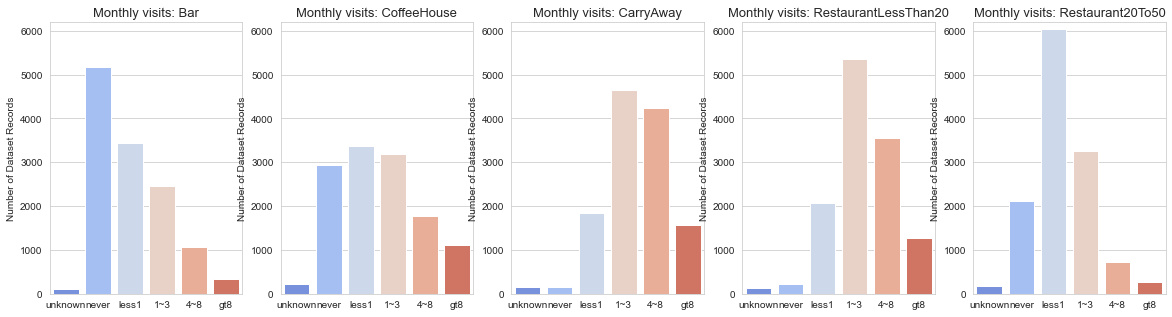

In [319]:
### Same as above, but use all records (ie up to 20 records per driver)
multirecord_driver_personal_data = data[list(driver_attribute_orderings.keys())]
multirecord_driver_personal_data.shape

fig, ax = plt.subplots(1,5, figsize=(20,5))

habit_features_list = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for i in range(len(habit_features_list)):
    vc = multirecord_driver_personal_data[habit_features_list[i]].value_counts()
    _ = sns.barplot(x=vc.index, y=vc, order = visit_freq_order, palette = 'coolwarm', ci=None, 
                ax=ax[i]).set_title(f'Monthly visits: {habit_features_list[i]}', fontsize=13);
    _ = ax[i].set(ylabel='Number of Dataset Records');
    _ = ax[i].set_ylim(ymin=0, ymax=6200)
plt.savefig('plots/distribution-monthly-visits-by-venue-numRecords.png', bbox_inches='tight')

## Response rate by visit habits for each coupon/venue type


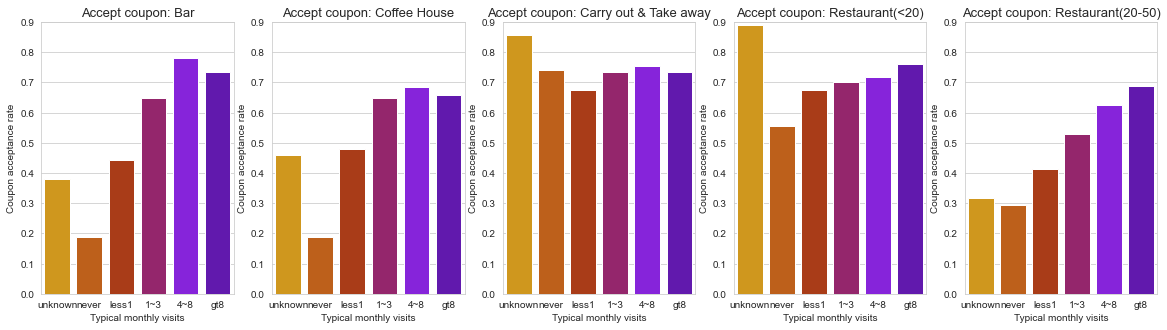

In [320]:
fig, ax = plt.subplots(1,5, figsize=(20,5))

## make sure these two lists are in the same order!
habits_list = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
coupon_types_list = ['Bar', 'Coffee House', 'Carry out & Take away', 'Restaurant(<20)', 'Restaurant(20-50)']

for i in range(len(habit_features_list)):
    _ = sns.barplot(x=habits_list[i], y="Y", data=data[data.coupon == coupon_types_list[i]], 
                order = visit_freq_order, palette = 'gnuplot_r', 
                    ci=None, ax=ax[i]).set_title(f'Accept coupon: {coupon_types_list[i]}', fontsize=13);
    _ = ax[i].set_ylim(ymin=0.0, ymax=0.9)
    _ = ax[i].set(ylabel='Coupon acceptance rate')
    _ = ax[i].set(xlabel='Typical monthly visits')
plt.savefig('plots/acceptance-rate-by-monthly-visits.png', bbox_inches='tight')
plt.show()

## Acceptance rate by each feature, split by coupon type

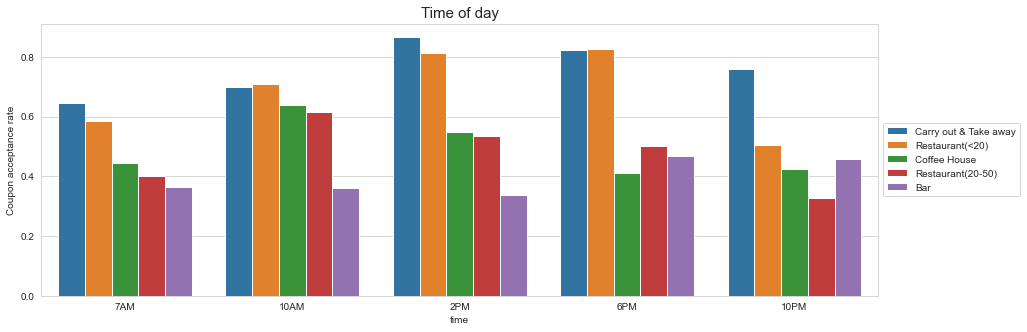

In [321]:
fig, ax = plt.subplots(figsize=(15,5))
_ = sns.barplot(x="time", y="Y", hue="coupon", data=sorted_data,
            order=time_order, ci=None, ax=ax).set_title('Time of day', fontsize=15);
_ = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = ax.set(ylabel='Coupon acceptance rate')
plt.show()

# Coupon Acceptance vs all Driver Attributes

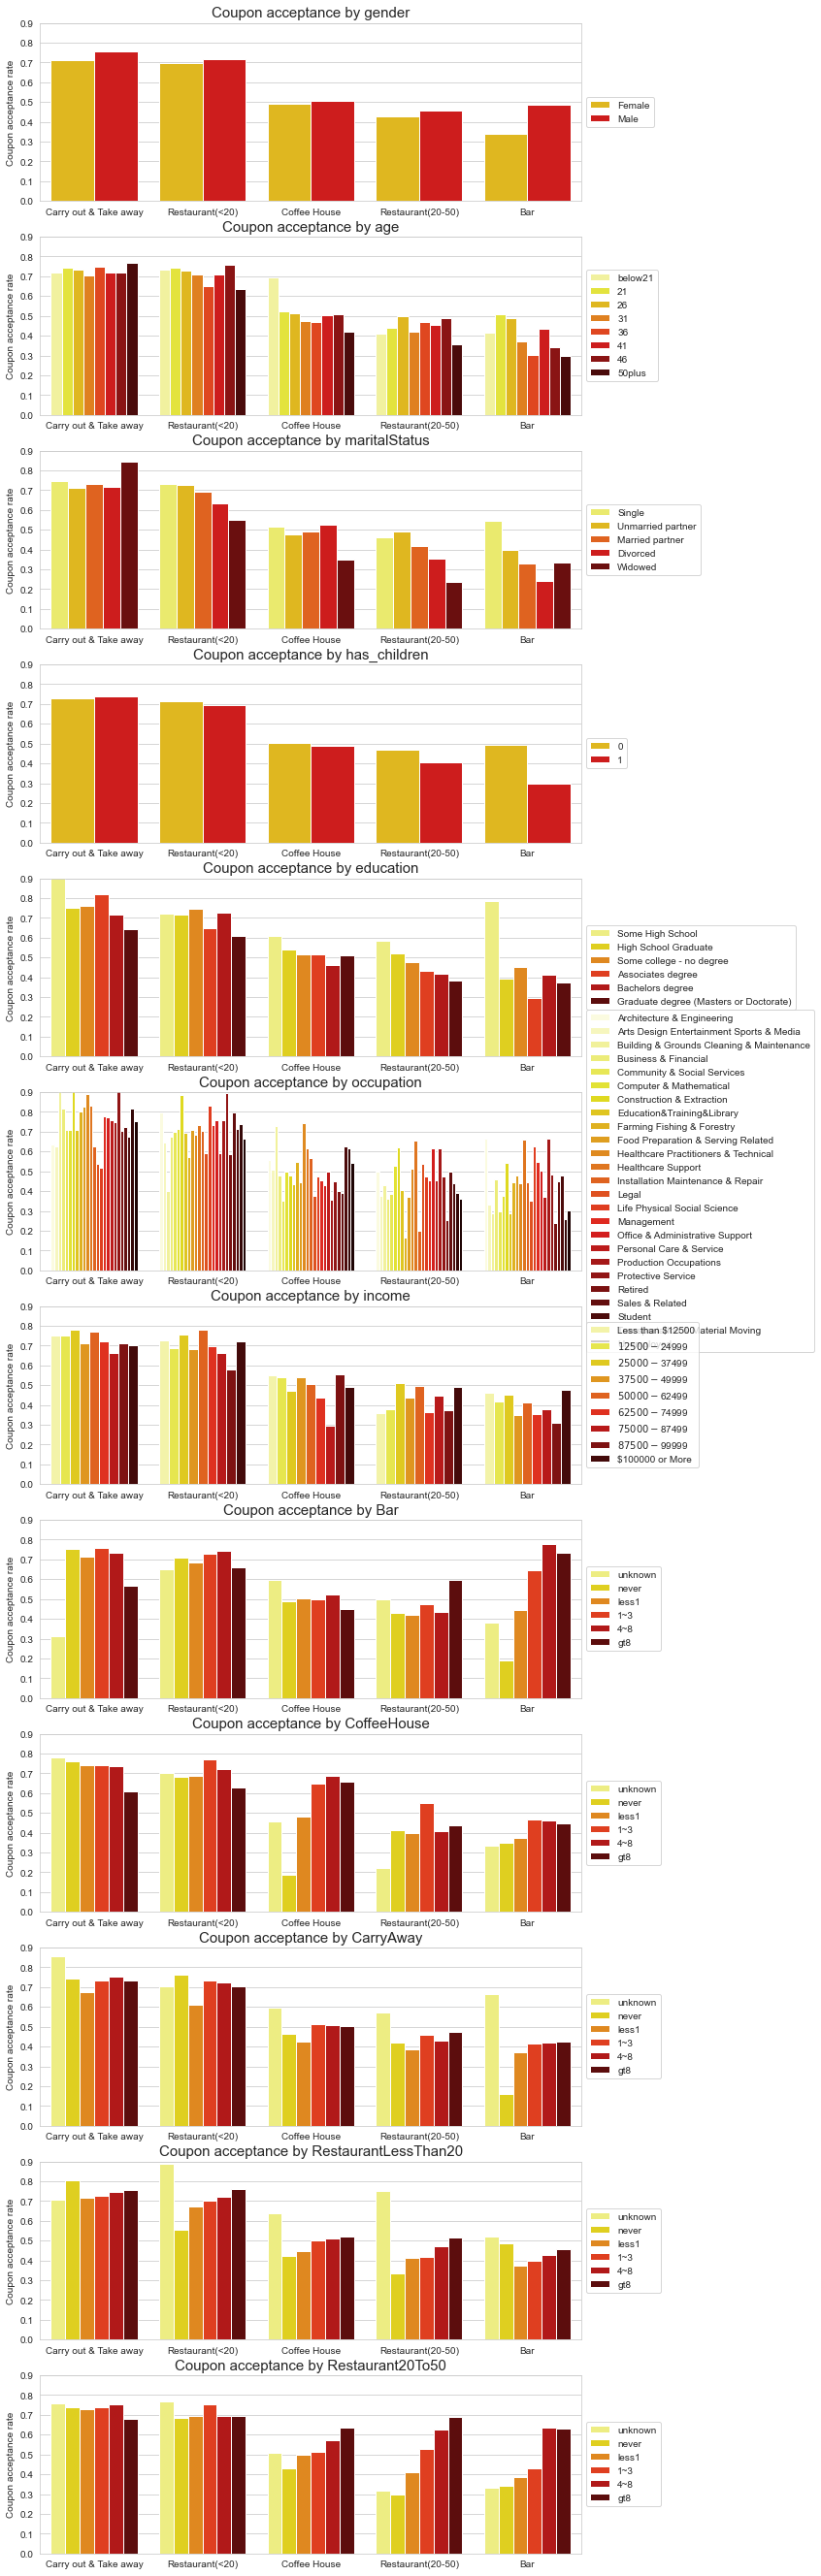

In [322]:
fig, ax = plt.subplots(len(driver_attribute_orderings), 1, figsize=(10,4*len(driver_attribute_orderings)))

feature_list = list(driver_attribute_orderings.keys())
for i in range(len(feature_list)):
    _ = sns.barplot(x="coupon", y="Y", hue=feature_list[i], 
                    data=driver_attribute_orderings[feature_list[i]]['sorted_data'], 
                    palette='hot_r', order=coupon_order, ci=None, 
                    ax=ax[i]).set_title(f'Coupon acceptance by {feature_list[i]}', fontsize=15);
    _ = ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    _ = ax[i].set_ylim(ymin=0.0, ymax=0.9)
    _ = ax[i].set(xlabel=None)
    _ = ax[i].set(ylabel='Coupon acceptance rate')
plt.show()

# Coupon Acceptance vs all Situation Contextual Attributes

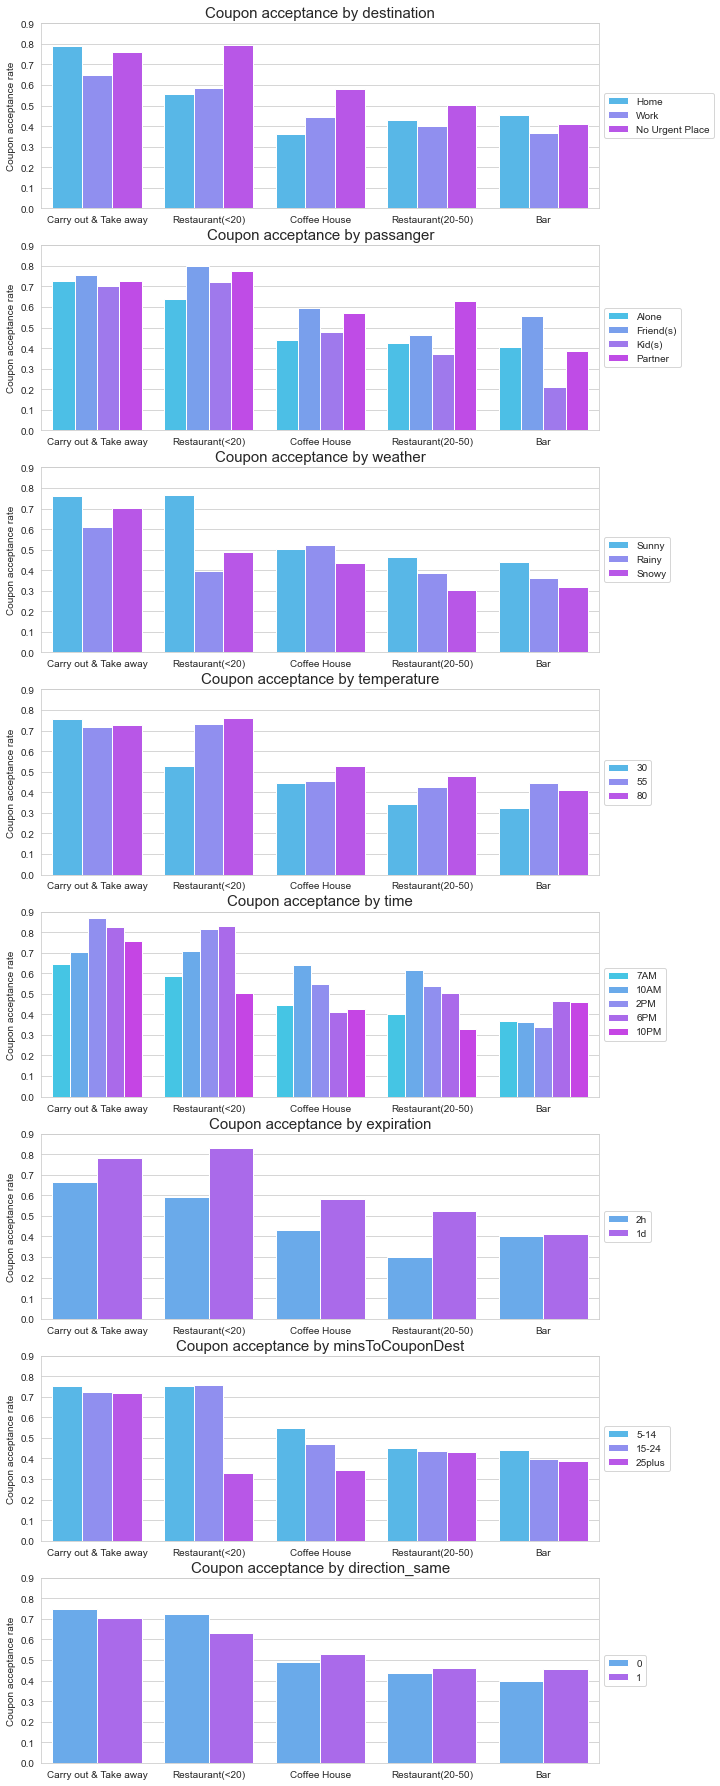

In [323]:
fig, ax = plt.subplots(len(contextual_attribute_orderings), 1, figsize=(10,4*len(contextual_attribute_orderings)))

feature_list = list(contextual_attribute_orderings.keys())
for i in range(len(feature_list)):
    _ = sns.barplot(x="coupon", y="Y", hue=feature_list[i], 
                    data=contextual_attribute_orderings[feature_list[i]]['sorted_data'], 
                    palette='cool', order=coupon_order, ci=None, 
                    ax=ax[i]).set_title(f'Coupon acceptance by {feature_list[i]}', fontsize=15);
    _ = ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    _ = ax[i].set_ylim(ymin=0.0, ymax=0.9)
    _ = ax[i].set(xlabel=None)
    _ = ax[i].set(ylabel='Coupon acceptance rate')
plt.show()

In [324]:
## Ages by education = 'Some High School'

data.loc[data.education == 'Some High School', 'age'].value_counts()

26    44
31    22
46    22
Name: age, dtype: int64

In [325]:
## personal attributes, people with some highschool
data.loc[data.education == 'Some High School', list(driver_attribute_orderings.keys())].drop_duplicates()

,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
6156,Female,31,Unmarried partner,0,Some High School,Computer & Mathematical,$12500 - $24999,1~3,1~3,4~8,1~3,less1
6801,Female,46,Married partner,1,Some High School,Unemployed,$12500 - $24999,never,never,less1,less1,never
10473,Male,26,Single,1,Some High School,Installation Maintenance & Repair,$12500 - $24999,4~8,1~3,1~3,4~8,4~8
12187,Male,26,Single,1,Some High School,Unemployed,Less than $12500,1~3,gt8,4~8,4~8,4~8


In [326]:
data[data.education == 'Some High School'].shape

(88, 22)

In [327]:
## education for age < 21
data.loc[data.age == 'below21', 'education'].value_counts()

Some college - no degree    434
High School Graduate         88
Bachelors degree             22
Name: education, dtype: int64

### Indiv plots

Text(0.5, 1.0, 'Coupon acceptance by Time of day')

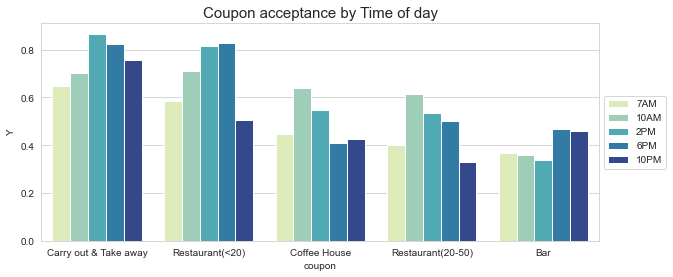

In [328]:
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(x="coupon", y="Y", hue="time", data=time_sorted_data, palette='YlGnBu',
            order=coupon_order, ci=None, ax=ax).set_title('Coupon acceptance by Time of day', fontsize=15);
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Text(0.5, 1.0, 'Coupon acceptance by Income')

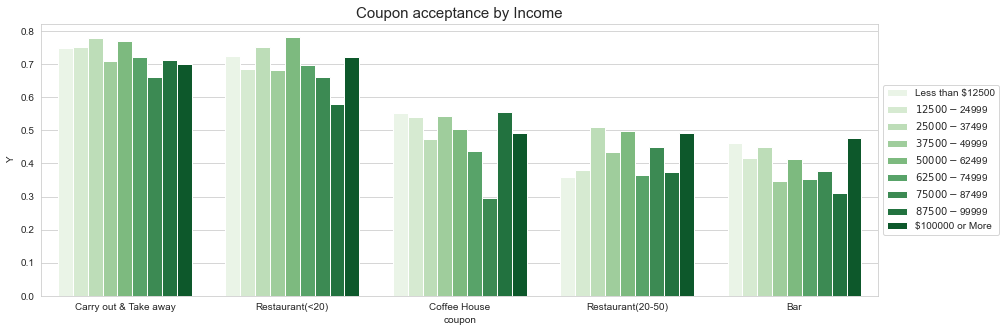

In [329]:
## by income
fig, ax = plt.subplots(figsize=(15,5))
sns.set_style("whitegrid")

sns.barplot(x="coupon", y="Y", hue="income", data=income_sorted_data, palette='Greens',
            order=coupon_order, ci=None, ax=ax).set_title('Coupon acceptance by Income', fontsize=15);
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Text(0.5, 1.0, 'Coupon acceptance by Age')

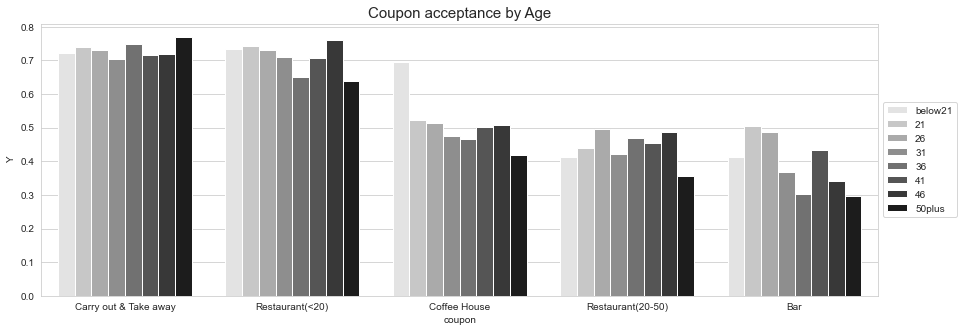

In [330]:
## by age
fig, ax = plt.subplots(figsize=(15,5))
sns.set_style("whitegrid")

sns.barplot(x="coupon", y="Y", hue="age", data=age_sorted_data, palette='binary',
            order=coupon_order, ci=None, ax=ax).set_title('Coupon acceptance by Age', fontsize=15);
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# 3 Feature plots: Acceptance rate by time, type, expiration

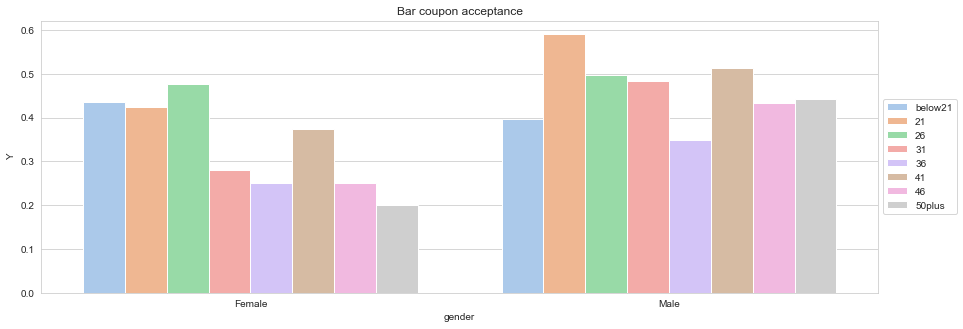

In [331]:
## Bar only gender split by age

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style("whitegrid")

_ = sns.barplot(x="gender", y="Y", hue="age", order=gender_order, palette='pastel',
            data=age_sorted_data[age_sorted_data['coupon']=='Bar'], 
            ci=None, ax=ax).set_title('Bar coupon acceptance')
_ = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

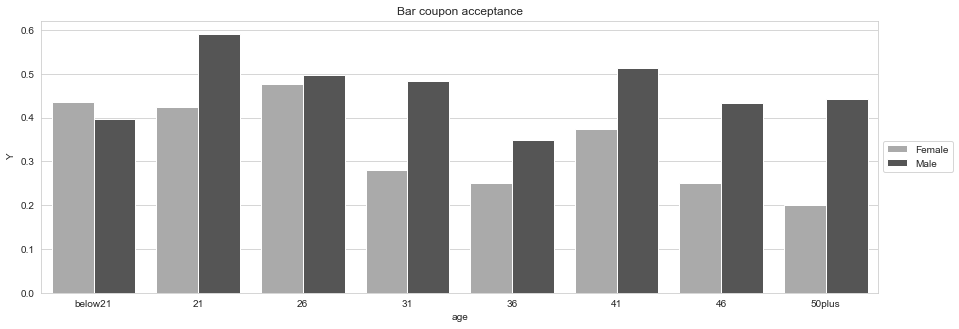

In [332]:
## Bar only --->>>> gender split by age

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style("whitegrid")

_ = sns.barplot(x="age", y="Y", hue="gender", order=age_order, palette='binary',
            data=gender_sorted_data[gender_sorted_data['coupon']=='Bar'], 
            ci=None, ax=ax).set_title('Bar coupon acceptance')
_ = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

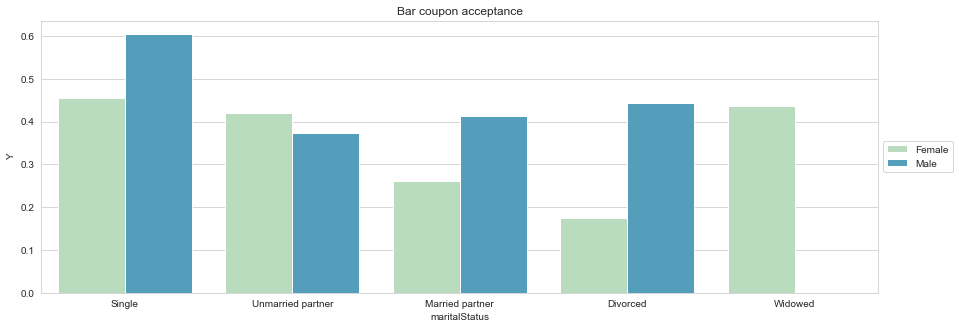

In [333]:
## Bar only --- gender split by marital status

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style("whitegrid")

_ = sns.barplot(x="maritalStatus", y="Y", hue="gender", order=maritalStatus_order, palette='GnBu',
            data=gender_sorted_data[gender_sorted_data['coupon']=='Bar'], 
            ci=None, ax=ax).set_title('Bar coupon acceptance')
_ = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

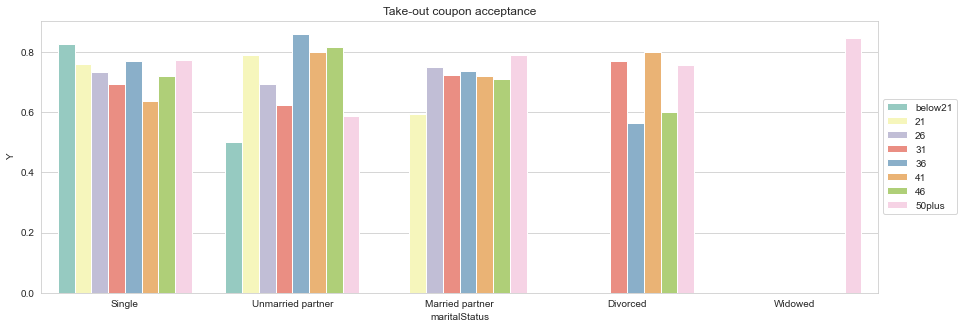

In [334]:
## Takeout only --- age split by marital status

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style("whitegrid")

_ = sns.barplot(x="maritalStatus", y="Y", hue="age", order=maritalStatus_order, palette='Set3',
            data=age_sorted_data[age_sorted_data['coupon']=='Carry out & Take away'], 
            ci=None, ax=ax).set_title('Take-out coupon acceptance')
_ = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [335]:
## count by coupon type: % direction_same == 1 (yes)

for i in range(len(coupon_order)):
    vc = data[data['coupon'] == coupon_order[i]].direction_same.value_counts()
    print(f'{coupon_order[i]} :\t\t{100*vc[1]/(vc[0]+vc[1]):.2f}% direction same')

Carry out & Take away :		33.79% direction same
Restaurant(<20) :		17.99% direction same
Coffee House :		18.78% direction same
Restaurant(20-50) :		17.27% direction same
Bar :		20.90% direction same


In [336]:
## ONLY minsToCouponDest 25plus -- count by coupon type: % direction_same == 1 (yes)
for i in range(len(coupon_order)):
    print(f'{coupon_order[i]}')
    data.loc[(data.coupon == coupon_order[i]) & (data.minsToCouponDest == '25plus'), 
                  'direction_same'].value_counts()
#     print(f'{coupon_order[i]} :\t\t{100*vc[1]/(vc[0]+vc[1]):.2f}% direction same (only 25plus minsToCouponDest)')

Carry out & Take away


0    222
Name: direction_same, dtype: int64

Restaurant(<20)


0    307
Name: direction_same, dtype: int64

Coffee House


0    310
Name: direction_same, dtype: int64

Restaurant(20-50)


0    114
Name: direction_same, dtype: int64

Bar


0    510
Name: direction_same, dtype: int64

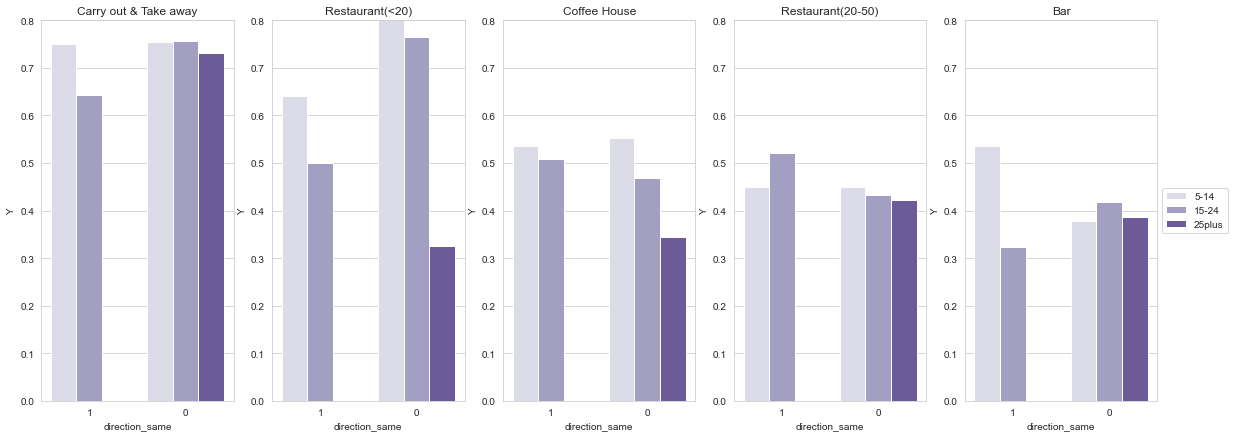

In [239]:
## subplot by coupon type, direction_same + minsToCouponDest
fig1, ax1 = plt.subplots(1, len(time_order), figsize=(20,7))
sns.set_style("whitegrid")

for i in range(len(coupon_order)):
    _ = sns.barplot(x="direction_same", y="Y", hue="minsToCouponDest", order=direction_same_order, 
                    palette='Purples',
                data=minsToCouponDest_sorted_data[minsToCouponDest_sorted_data['coupon']==coupon_order[i]], 
                ci=None, ax=ax1[i]).set_title(coupon_order[i])
    _ = ax1[i].set_ylim(ymin=0.0, ymax=0.8)
    if i != len(time_order)-1:
        ax1[i].get_legend().remove()
    else:
        _ = ax1[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

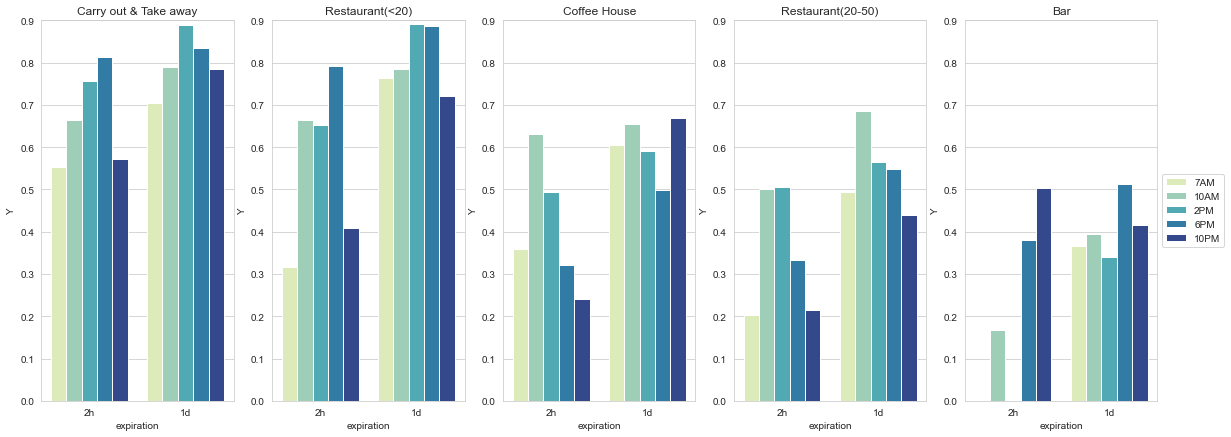

In [337]:
## subplot by coupon type, expiration + grouped bars by time
fig1, ax1 = plt.subplots(1, len(time_order), figsize=(20,7))
sns.set_style("whitegrid")

for i in range(len(coupon_order)):
    _ = sns.barplot(x="expiration", y="Y", hue="time", order=['2h', '1d'], palette='YlGnBu',
                data=time_sorted_data[time_sorted_data['coupon']==coupon_order[i]], 
                ci=None, ax=ax1[i]).set_title(coupon_order[i])
    _ = ax1[i].set_ylim(ymin=0.0, ymax=0.9)
    if i != len(time_order)-1:
        ax1[i].get_legend().remove()
    else:
        _ = ax1[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

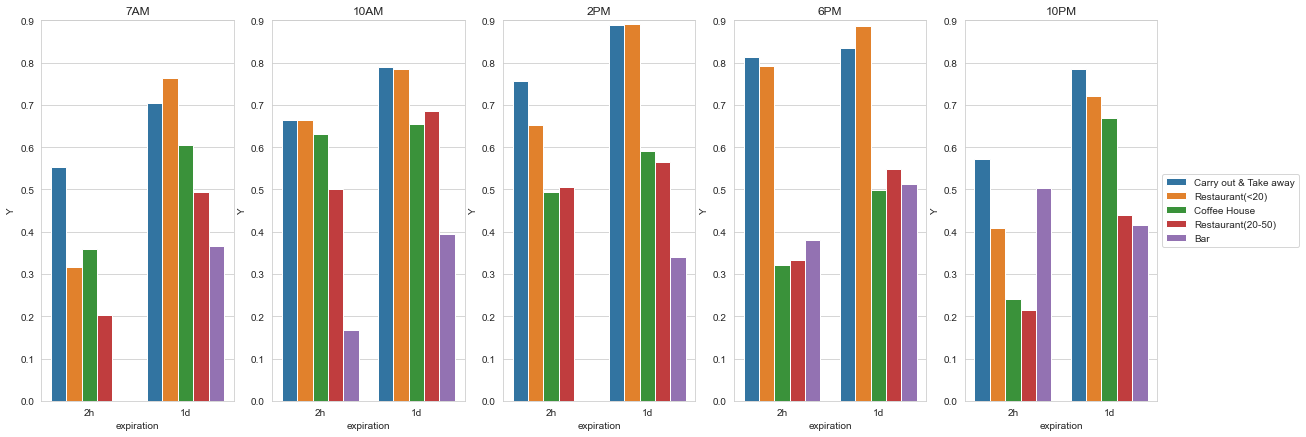

In [338]:
## subplot by time grouped bars by coupon type
fig1, ax1 = plt.subplots(1, len(time_order), figsize=(20,7))
sns.set_style("whitegrid")

for i in range(len(time_order)):
    _ = sns.barplot(x="expiration", y="Y", hue="coupon", order=['2h', '1d'],
                data=sorted_data[sorted_data['time']==time_order[i]], ci=None, ax=ax1[i]).set_title(time_order[i]);
    _ = ax1[i].set_ylim(ymin=0.0, ymax=0.9)
    if i != len(time_order)-1:
        ax1[i].get_legend().remove()
    else:
        _ = ax1[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

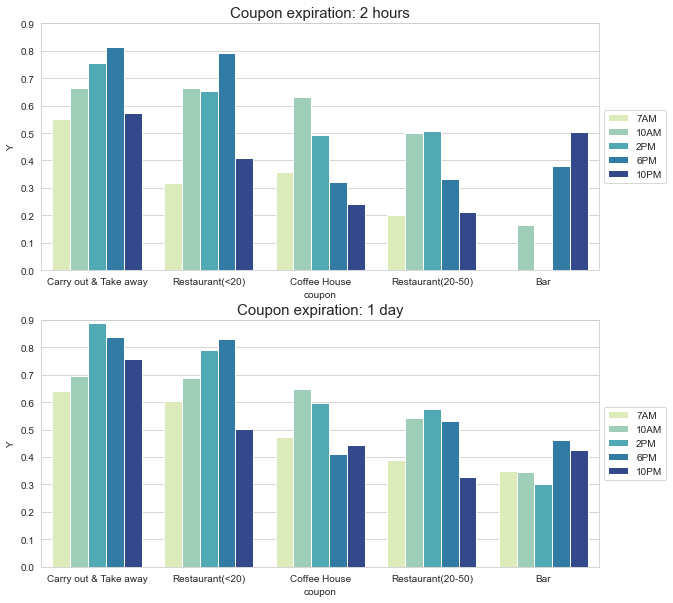

In [339]:
fig, ax = plt.subplots(2,1, figsize=(10,10))
sns.set_style("whitegrid")

_ = sns.barplot(x="coupon", y="Y", hue="time", palette='YlGnBu',
                data=time_sorted_data[time_sorted_data['expiration']=='2h'], 
            order=coupon_order, ci=None, ax=ax[0]).set_title('Coupon expiration: 2 hours', fontsize=15)
_ = ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = ax[0].set_ylim(ymin=0.0, ymax=0.9)
_ = sns.barplot(x="coupon", y="Y", hue="time", palette='YlGnBu',
                data=time_sorted_data[sorted_data['expiration']=='1d'], 
            order=coupon_order, ci=None, ax=ax[1]).set_title('Coupon expiration: 1 day', fontsize=15)
_ = ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = ax[1].set_ylim(ymin=0.0, ymax=0.9)
plt.show()